## All libraries

In [0]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
import json
import multiprocessing 

In [0]:
android_activity_json_file = open('data//android_activity.json', 'r', encoding="utf8")

In [0]:
android_activity_json_data = pd.read_json(android_activity_json_file)

In [0]:
android_activity_json_data.head()

,details,header,products,time,title,titleUrl
0,NaN,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",[Android],2019-09-25T13:15:13.658Z,Viewed AJRMain,NaN
1,NaN,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",[Android],2019-09-25T13:15:13.658Z,Viewed AJRMain,https://www.google.com/url?q=http://paytm.com/...
2,NaN,Uber Eats: Local Food Delivery,[Android],2019-09-25T12:10:44.406Z,Used Uber Eats: Local Food Delivery,https://play.google.com/store/apps/details?id=...
3,NaN,com.miui.home,[Android],2019-09-25T12:10:38.048Z,Used com.miui.home,NaN
4,NaN,WhatsApp Messenger,[Android],2019-09-25T12:09:58.158Z,Used WhatsApp Messenger,https://play.google.com/store/apps/details?id=...


In [0]:
android_activity_json_data.tail()

,details,header,products,time,title,titleUrl
100070,NaN,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",[Android],2016-12-10T14:34:21.621Z,Viewed AJRMain Page,https://www.google.com/url?q=http://paytm.com/...
100071,NaN,News by The Times of India Newspaper - Latest ...,[Android],2016-12-10T13:47:07.668Z,Viewed The Times Of India,https://www.google.com/url?q=http://timesofind...
100072,NaN,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",[Android],2016-12-10T13:01:20.656Z,Viewed AJRMain Page,https://www.google.com/url?q=http://paytm.com/...
100073,NaN,Mi Store,[Android],2016-11-04T10:33:20.328Z,Viewed MiShop India,https://www.google.com/url?q=http://mobile.mi....
100074,NaN,Mi Store,[Android],2016-11-03T08:56:55.160Z,Viewed MiShop India,https://www.google.com/url?q=http://mobile.mi....


In [0]:
android_activity_json_data['time'] = pd.to_datetime(android_activity_json_data['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [0]:
android_activity_json_data.shape

(100075, 6)

In [0]:
data_by_app = android_activity_json_data.groupby('header').count().sort_values('products', ascending=False)

In [0]:
apps_used_till_now = data_by_app.index

In [0]:
# for app in apps_used_till_now:
#     print(app)

In [0]:
data_by_app.head()

,details,products,time,title,titleUrl
header,,,,,
Wynk Music - Download & Play Songs & MP3 for Free,0,27815,27815,27815,7152
com.miui.home,0,7627,7627,7627,0
WhatsApp Messenger,0,6672,6672,6672,6672
Facebook,0,4927,4927,4927,4927
Inshorts - 60 words News summary,0,4826,4826,4826,4826


In [0]:
print('no of apps used till now: ', len(data_by_app))

no of apps used till now:  194


In [0]:
print('top 10 apps used by you: ', data_by_app.index[:10])

top 10 apps used by you:  Index(['Wynk Music - Download & Play Songs & MP3 for Free', 'com.miui.home',
       'WhatsApp Messenger', 'Facebook', 'Inshorts - 60 words News summary',
       'com.miui.securitycenter', 'Contacts', 'com.android.server.telecom',
       'Dailyhunt (Newshunt)- Cricket, News,Videos',
       'Messenger – Text and Video Chat for Free'],
      dtype='object', name='header')


In [0]:
print('least 20 apps used by you: ', data_by_app.index[-20:])

least 20 apps used by you:  Index(['Fynd - Online Shopping App', 'com.xiaomi.finddevice',
       'Google Trips - Travel Planner', 'Google Text-to-Speech',
       'M-Connect Plus', 'JioCinema: Movies TV Originals',
       'com.miui.virtualsim', 'com.miui.screenrecorder', 'com.miui.hybrid',
       'Photo On Birthday Cake - Cake with name and photo',
       'com.miui.cloudbackup', 'Tinder', 'Wefast — Courier Delivery Service',
       'Yahoo Mail – Organized Email', 'com.kamukkahaniya.nightstory2',
       'com.iiitd.saahilshah.mymusic', 'ZAFUL - My Fashion Story',
       'com.example.shishir.myapplication',
       'Zynga Poker – Free Texas Holdem Online Card Games', 'PingID'],
      dtype='object', name='header')


In [0]:
def get_app_usage_frequency(app_name):
#     print(app_name)
    app_data = android_activity_json_data[android_activity_json_data['header'] == app_name]
    app_data = app_data.groupby([app_data['time'].dt.year, app_data['time'].dt.month]).count()
    time = []
    freq = []
#     print(app_data.head())
    n = len(app_data.index)
#     print(n)
    for i in range(n):
        yr, mon = app_data.index[i]
#         print(yr, mon)
        fr = app_data.loc[yr].loc[mon]['header']
        time.append(str(mon)+"-"+str(yr))
        freq.append(fr)

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.plot(time,freq ,'ko-', color=np.random.rand(3,))
    ax1.set_xticklabels(time, rotation=45)
    ax1.set_xlabel('Months')
    ax1.set_ylabel('Nunber of times used')
    ax1.set_title('Usage statistics for '+app_name)
    return app_data

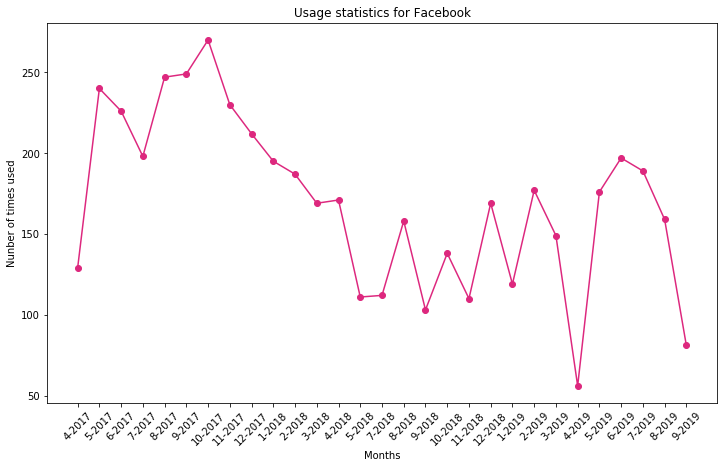

In [0]:
data = get_app_usage_frequency('Facebook')

In [0]:
appwise_timely_data = android_activity_json_data.groupby([android_activity_json_data['time'].dt.year, android_activity_json_data['time'].dt.month, android_activity_json_data['header']]).count()

In [0]:
def show_maximum_used_app_for_month():
    appwise_timely_data = android_activity_json_data.groupby([android_activity_json_data['time'].dt.year, android_activity_json_data['time'].dt.month, android_activity_json_data['header']]).count()
    n = len(appwise_timely_data.index)
#     print(n)
    time = []
    freq = []
    apps = []
    dataframe = pd.DataFrame([], columns=['time', 'freq', 'apps'])
    color_dict = {}
    for i in range(n):
        yr, mon, _app = appwise_timely_data.index[i]
        d = appwise_timely_data.loc[yr].loc[mon]
        max_freq = d.max(axis=0)['products']
        app = d.idxmax(axis = 0)['products']
        apps.append(app)
        color_dict[app] = np.random.rand(3,)
#         print(app)
        time.append(str(mon)+"-"+str(yr))
        freq.append(max_freq)
#     print(time)
    dataframe['time'] = pd.Series(time)
    dataframe['freq'] = pd.Series(freq)
    dataframe['apps'] = pd.Series(apps)
    dataframe['size'] = 10*dataframe['freq']
    
#     cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.scatterplot(x="time", y="freq",hue='apps',size="size", data=dataframe)
    ax.set_title("Showing app usage is maximum in a month")
    for item in ax.get_xticklabels():
        item.set_rotation(45)

    return appwise_timely_data

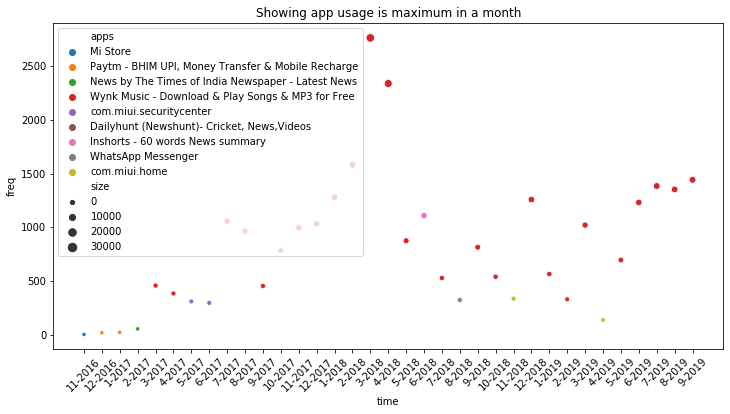

In [0]:
d = show_maximum_used_app_for_month()

In [0]:
def app_usage_on_morning(k=15):
    d = android_activity_json_data[android_activity_json_data['time'].dt.hour <=11]
    d = d.groupby('header').count().sort_values('products', ascending=False)[:k]
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(x=d.index, y="products",palette="Blues_d", data=d, dodge=False)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.set_xlabel('App')
    ax.set_ylabel('App usage Frequency')
    ax.set_title('App Usage Frequency in morning time')

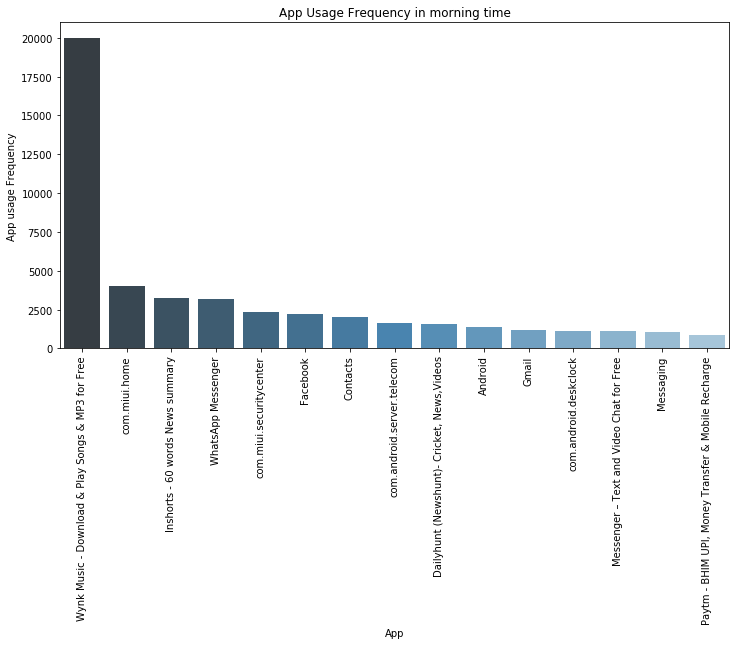

In [0]:
app_usage_on_morning()

In [0]:
def app_usage_on_daytime(k=15):
    d = android_activity_json_data[(android_activity_json_data['time'].dt.hour >=12) & (android_activity_json_data['time'].dt.hour <21)]
    d = d.groupby('header').count().sort_values('products', ascending=False)[:k]
    fig, ax = plt.subplots(figsize=(7, 4))
    X= list(d.index)
#     print(X)
    X = [re.split('–|-', x)[0] for x in X]
#     print(X)
    ax = sns.barplot(x=X, y="products",palette="Blues_d", data=d, dodge=False)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.set_xlabel('App')
    ax.set_ylabel('App usage Frequency')
    ax.set_title('App Usage Frequency in daytime')

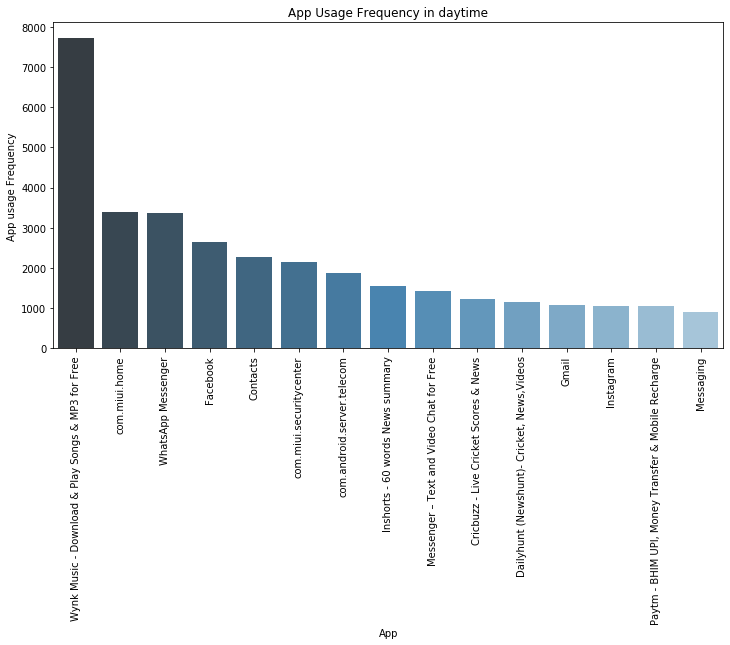

In [0]:
app_usage_on_daytime()

In [0]:
def app_usage_on_nightime(k=15):
    d = android_activity_json_data[android_activity_json_data['time'].dt.hour >21]
    d = d.groupby('header').count().sort_values('products', ascending=False)[:k]
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(x=d.index, y="products",palette="Blues_d", data=d, dodge=False)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.set_xlabel('App')
    ax.set_ylabel('App usage Frequency')
    ax.set_title('App Usage Frequency in Evening time')

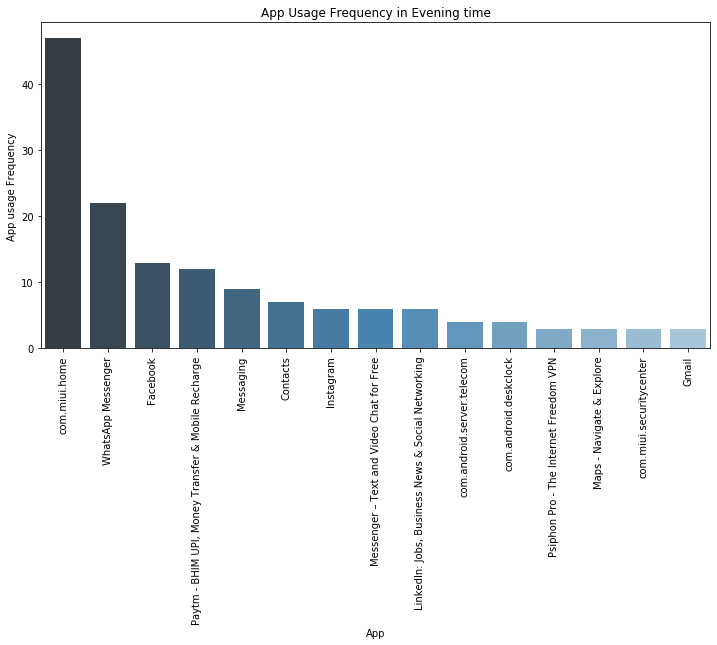

In [0]:
app_usage_on_nightime()

In [0]:
d = android_activity_json_data.groupby([android_activity_json_data['time'].dt.year, android_activity_json_data['time'].dt.month]).count()

In [0]:
d.head()

details  header  products  time  title  titleUrl
time time                                                  
2016 11          0       2         2     2      2         2
     12          0      39        39    39     39        39
2017 1           0      54        54    54     54        54
     2           0     200       200   200    200       200
     3           0     608       608   608    608       608

In [0]:
d.loc[2017].loc[2]['header']

200

In [0]:
def show_app_usage_month_wise():
    d = android_activity_json_data.groupby([android_activity_json_data['time'].dt.year, android_activity_json_data['time'].dt.month]).count()
    n = len(d.index)
    freq = []
    time = []
    for i in range(n):
        yr, mon = d.index[i]
        time.append(str(yr)+"-"+str(mon))
        freq.append(d.loc[yr].loc[mon]['header'])
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.plot(time,freq ,'ko-', color=np.random.rand(3,))
    ax1.set_xticklabels(time, rotation=45)
    ax1.set_xlabel('Months')
    ax1.set_ylabel('Nunber of times used')
    ax1.set_title('Usage statistics for applications over time')
    

In [0]:
def show_app_usage_year_wise():
    d = android_activity_json_data.groupby(android_activity_json_data['time'].dt.year).count()
    sns.lineplot(x=d.index, y="products", data=d, c='red')
    

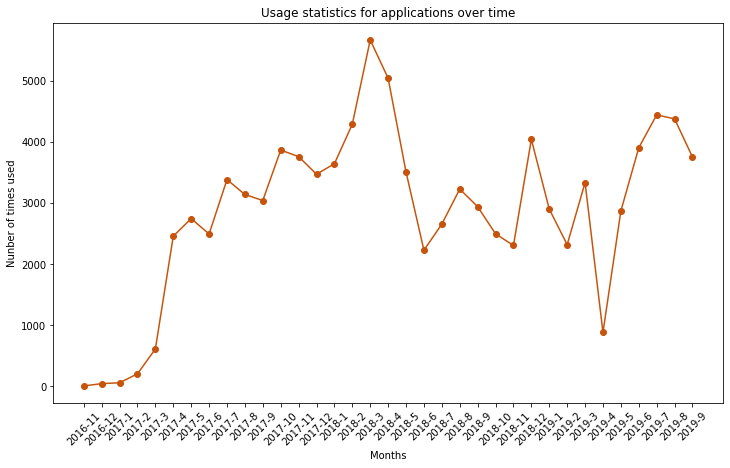

In [0]:
show_app_usage_month_wise()

## working on app categories

In [0]:
import requests
from lxml import html
from bs4 import BeautifulSoup
import xml.etree.cElementTree as ET

In [0]:
import re

In [0]:
app_name_to_id_dict = {}

In [0]:
# def read_in_chunks(file_object, chunk_size=1024):
#     """Lazy function (generator) to read a file piece by piece.
#     Default chunk size: 1k."""
#     while True:
#         data = file_object.read(chunk_size)
#         if not data:
#             break
#         yield data


# f = open('data//MyActivity.html', 'r', encoding='utf-8')
# for piece in read_in_chunks(f):
#     soup = BeautifulSoup(piece, "html.parser")
#     a_tags = soup.find_all('a', href=True)
#     if(len(a_tags) == 0):
#         continue
#     else:
#         for tag in a_tags:
#             tag_str = str(tag)
#             if(tag_str.find('https://play.google.com/store/apps/details?id=')):
# #                 print(tag_str)
#                 obj1 = re.search('<a href=\"(.+)\">', tag_str)
#                 if(obj1 is not None):
#                     s = obj1.group(1)
#                     obj2 = re.search('id=(.+)', s)
#                     #obj2 = re.search('>(.+)</a>',tag_str)
#                     app_name = tag.string
#                     if app_name is not None and obj2 is not None:
#                         app_id = obj2.group(1)
#                         #app_name = obj2.group(1)
#                         #app_name = tag.string
#                         app_name_to_id_dict[app_name] = app_id
# #                         print(app_name +"--->"+app_id)


In [0]:
# app_name_to_id_dict

In [0]:
api_key = '*******************'

In [0]:
def get_android_app_description(app_name, api_key):
#     print(app_name)
    try:
        app_id = app_name_to_id_dict[app_name]
#         print(app_id)

        store = "android"       # Could be either "android" or "itunes".
        country_code = "US"     # Two letter country code.

        req_params = {"country": country_code}

        # Auth Parameters
        username = api_key  # Replace {API_KEY} with your own API key.
        password = "X"          # Password can be anything.

        # Request URL
        url = "https://api.appmonsta.com/v1/stores/%s/details/%s.json" % (store, app_id)

        # This header turns on compression to reduce the bandwidth usage and transfer time.
        headers = {'Accept-Encoding': 'deflate, gzip'}

        # Python Main Code Sample
        response = requests.get(url,
                                auth=(username, password),
                                params=req_params,
                                headers=headers,
                                stream=True)

    #     print(response.status_code)
        response_code = response.status_code
        
#         print(response_code)
        if(int(response_code/100) != 2):
                return None

        json_data = json.loads(response.text)
        resultant_json = {'app_name': app_name,
                          'app_id':app_id, 
                            'genre': json_data['genre'],
                            'app_type': json_data['app_type'],
                            'price': json_data['price'],
                            'downloads': json_data['downloads']
                         }
        return resultant_json
    except exception as e:
        print(e)
        return None


In [0]:
# app_data = get_android_app_description('WhatsApp Messenger', api_key)

In [0]:
## useful variables->genres, app_type, price, downloads, 

In [0]:
# app_data['genres']

In [0]:
def get_all_app_data_dataframe(android_activity_json_data, api_key):
    all_data = []
    apps_used_by_user = android_activity_json_data.header.unique()
    
    for app in apps_used_by_user:
        try:
            #print(app)
            app_data = get_android_app_description(app, api_key)
            #print(app_data)
            if(app_data is not None):
                all_data.append(app_data)
        except:
            continue
            
    dataframe = pd.DataFrame(all_data, columns = ['app_name', 'app_id', 'genre', 'app_type', 'price', 'downloads'])
    return dataframe
    

In [0]:
# dataframe = get_all_app_data_dataframe(android_activity_json_data, api_key)

In [0]:
import pickle

In [0]:
# with open('app_data', 'wb') as file:
#     pickle.dump(dataframe, file)

In [0]:
with open('app_data', 'rb') as file:
    app_data = pickle.load(file)

In [0]:
app_data.head()

,app_name,app_id,genre,app_type,price,downloads
0,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",net.one97.paytm,Shopping,APPLICATION,Free,"100,000,000+"
1,Uber Eats: Local Food Delivery,com.ubercab.eats,Food & Drink,APPLICATION,Free,"50,000,000+"
2,WhatsApp Messenger,com.whatsapp,Communication,APPLICATION,Free,"1,000,000,000+"
3,Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,APPLICATION,Free,"5,000,000,000+"
4,Facebook,com.facebook.katana,Social,APPLICATION,Free,"1,000,000,000+"


### analyzing trends with app description....

In [0]:
def get_app_name_genre_dict():
    json_obj = {}
    for index, row in app_data.iterrows():
        json_obj[row['app_name']]=row['genre']
    return json_obj


In [0]:
def plot_number_of_app_installed_category_wise():
    d = app_data.groupby('genre').count().sort_values('app_name', ascending=False)
    f, ax1 = plt.subplots(figsize=(15, 5))
    sns.barplot(x=d.index, y=d['app_name'], palette="rocket", ax=ax1)
    ax1.axhline(0, color="k", clip_on=False)
    ax1.set_ylabel("No of app installed of this category")
    ax1.set_title('Number of app installed of different categories in your device')
    for item in ax1.get_xticklabels():
        item.set_rotation(75)

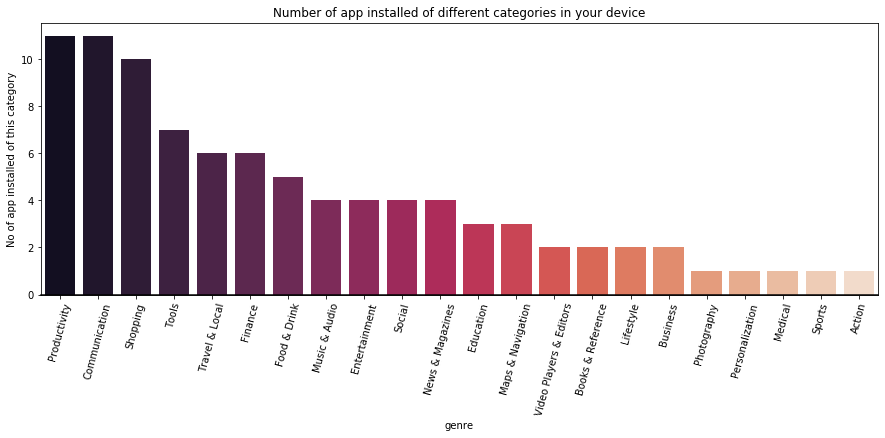

In [0]:
plot_number_of_app_installed_category_wise()

In [0]:
d = get_app_name_genre_dict()

In [0]:
df= android_activity_json_data[['header', 'time']]

In [0]:
def f(x):
    if d.get(x) is not None:
        return d[x]
    else:
        return None

In [0]:
df['app_genre'] = df['header'].apply(lambda x: f(x))

C:\Users\Shishir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.head()

,header,time,app_genre
0,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",2019-09-25 13:15:13.658000+00:00,Shopping
1,"Paytm - BHIM UPI, Money Transfer & Mobile Rech...",2019-09-25 13:15:13.658000+00:00,Shopping
2,Uber Eats: Local Food Delivery,2019-09-25 12:10:44.406000+00:00,Food & Drink
3,com.miui.home,2019-09-25 12:10:38.048000+00:00,None
4,WhatsApp Messenger,2019-09-25 12:09:58.158000+00:00,Communication


### analysing which type of apps user used most frequenly 

In [0]:
def plot_freq_app_cat_used(df):
    app_cat_freq= df.groupby('app_genre').count()['header']
    labels = list(app_cat_freq.index)
    freq = app_cat_freq.values
    total_freq= np.sum(freq)
    sizes = np.ceil((freq/total_freq)*100).astype(int)
    # print(sizes)
    new_labels = []
    new_sizes = []
    for i in range(len(sizes)):
        if(sizes[i]>3):
            new_labels.append(labels[i])
            new_sizes.append(sizes[i])

    fig1, ax1 = plt.subplots()
    ax1.pie(new_sizes, labels=new_labels, autopct='%1.1f%%', startangle=90)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.title("Figutre showing % frequency of app used categories")
    plt.tight_layout()
    plt.show()

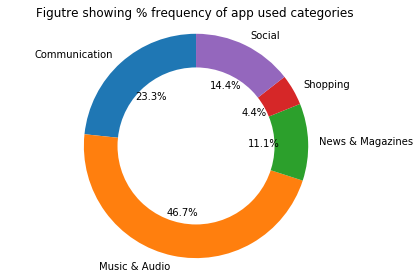

In [0]:
plot_freq_app_cat_used(df)